In [1]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd
import random

In [2]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

def extractVals(ckptname):
    _, epoch, loss = ckptname.split('-')
    return int(epoch), float(loss)

def getXY(csvfile):
    frame = pd.read_csv(csvfile)
    x = frame['ckpt'].apply(extractVals)
    x = list(x)
    epochs, losses = zip(*x)
    f1 = list(frame["f1"]/100)
    return Namespace(epochs=epochs, losses=losses, f1=f1)

In [3]:
greedy = getXY('testa_beam1.csv')
beam = getXY('testa_beam8_old_ls.csv')

Text(0.5, 1.0, 'Beam Search and performance')

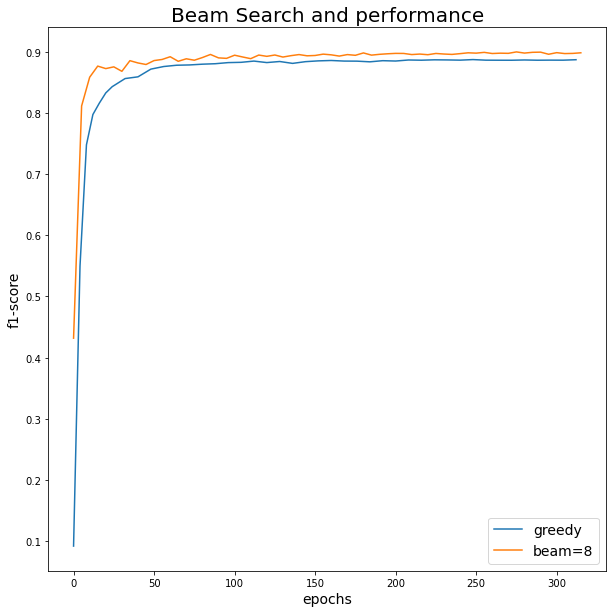

In [7]:
plt.figure(figsize=(10, 10))
i = greedy.epochs.index(320)
plt.plot(greedy.epochs[:i], greedy.f1[:i], label='greedy')

i = beam.epochs.index(320)
plt.plot(beam.epochs[:i], beam.f1[:i], label='beam=8')
plt.legend(prop={'size': 14})
plt.xlabel('epochs', fontsize=14)
plt.ylabel('f1-score', fontsize=14)
plt.title('Beam Search and performance', fontsize=20)